In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
Transactions=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Transactions')

In [3]:
Transactions=Transactions[['User_id','Order_id','DATE','GMV','Service Group','MerchantID']]


In [4]:
Transactions['User_id']=Transactions['User_id'].astype(str)
Transactions['Order_id']=Transactions['Order_id'].astype(str)
Transactions['MerchantID']=Transactions['MerchantID'].astype(str)

In [5]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID
0,61386143,8733622706,2021-01-01,100000,marketplace,37
1,48453125,8726857991,2021-01-01,5000,supermarket,9
2,49921027,8737326894,2021-01-01,106600,supermarket,9
3,46022523,8732579078,2021-01-01,270000,supermarket,9
4,44014594,8725567343,2021-01-01,68000,cvs,8


In [6]:
Total_GMV=Transactions['GMV'].sum()
print('Tổng tiền :{:,.0f}'.format(Total_GMV)+' VND')


Tổng tiền :7,561,407,694 VND


In [7]:
Loyalty_Points=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Loyalty Points')

In [8]:
Loyalty_Points

,Service Group,Point Mechanism,Maximum Point Per Trans
0,supermarket,1 points/1000VND GMV,500 points
1,data,10 points/1000VND GMV,1000 points
2,cvs,1 points/1000VND GMV,300 points
3,marketplace,1 points/1000VND GMV,500 points
4,Coffee chains and Milk tea,1 points/1000VND GMV,500 points
5,Offline Beverage,1 points/1000VND GMV,300 points


In [9]:
Loyalty_Benefits=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Loyalty benefits')

In [10]:
Loyalty_Benefits['Class ID']=Loyalty_Benefits['Class ID'].astype(str)
Loyalty_Benefits

,Class ID,Group,%cashback
0,2,cvs,5
1,2,Offline Beverage,5
2,2,data,5
3,3,cvs,7
4,3,Offline Beverage,7
5,3,data,7
6,3,marketplace,2
7,3,supermarket,2
8,4,cvs,12
9,4,Offline Beverage,12


In [11]:
# Loyalty_Benefits.dtypes

# Part 1

1,

In [12]:
new_Loyalty_Points=Loyalty_Points[['Service Group','Maximum Point Per Trans']]
new_Loyalty_Points['Maximum Point Per Trans']=new_Loyalty_Points['Maximum Point Per Trans'].apply(lambda x: x.split(' ')[0])
Transactions=Transactions.merge(new_Loyalty_Points,on='Service Group',how='left')

C:\Users\ACER\AppData\Local\Temp\ipykernel_16232\1909542948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_Loyalty_Points['Maximum Point Per Trans']=new_Loyalty_Points['Maximum Point Per Trans'].apply(lambda x: x.split(' ')[0])


In [13]:
# Transactions['Loyalty Points 1'] =Transactions.apply(lambda row: int(row['GMV'] / 1000 * 10) if row['Service Group'] == 'data'
#                                                        else int(row['GMV'] / 1000 * 1), axis=1)

TIME = pd.to_datetime('2022-01-01')
def calculate_loyalty_points(row):
    if row['DATE'] >= TIME:
        if row['Service Group'] == 'data':
            return int(row['GMV'] / 1000 * 10)
        else:
            return int(row['GMV'] / 1000 * 1)
    else:
        return 0

Transactions['Loyalty Points 1'] = Transactions.apply(calculate_loyalty_points, axis=1)

In [14]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Maximum Point Per Trans,Loyalty Points 1
0,61386143,8733622706,2021-01-01,100000,marketplace,37,500,0
1,48453125,8726857991,2021-01-01,5000,supermarket,9,500,0
2,49921027,8737326894,2021-01-01,106600,supermarket,9,500,0
3,46022523,8732579078,2021-01-01,270000,supermarket,9,500,0
4,44014594,8725567343,2021-01-01,68000,cvs,8,300,0


In [15]:
Transactions['Maximum Point Per Trans']=Transactions['Maximum Point Per Trans'].astype(int)

In [16]:
Transactions['Loyalty Points']=Transactions.apply(lambda row : row['Loyalty Points 1'] if row['Loyalty Points 1'] < row['Maximum Point Per Trans'] 
                                                  else row['Maximum Point Per Trans'],axis=1)

In [17]:
Transactions.drop(['Maximum Point Per Trans','Loyalty Points 1'],axis=1,inplace=True)


In [18]:
Transactions.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points
0,61386143,8733622706,2021-01-01,100000,marketplace,37,0
1,48453125,8726857991,2021-01-01,5000,supermarket,9,0
2,49921027,8737326894,2021-01-01,106600,supermarket,9,0
3,46022523,8732579078,2021-01-01,270000,supermarket,9,0
4,44014594,8725567343,2021-01-01,68000,cvs,8,0


In [19]:
# x=input('nhập date (yyyy-mm-dd):')
# current_date = datetime.datetime.strptime(x,'%Y-%m-%d')
current_date = datetime.datetime(2022,3,31)
days_to_reset = 30
reset_date = current_date - datetime.timedelta(days=days_to_reset)
# print(reset_date)
Transactions.loc[Transactions['DATE'] < reset_date , 'Loyalty Points'] = 0


In [20]:
Loyalty_Ranking=Transactions.groupby('User_id')['Loyalty Points'].sum().reset_index()

In [21]:
Loyalty_Ranking.head()

,User_id,Loyalty Points
0,10056218,880
1,10071920,0
2,10093330,0
3,10154027,0
4,10156282,100


In [22]:
Loyalty_Ranking.drop(Loyalty_Ranking[Loyalty_Ranking['Loyalty Points'] == 0].index, inplace=True)


In [23]:
Loyalty_Ranking['Rank_name']=Loyalty_Ranking['Loyalty Points'].apply(lambda x: 'DIAMOND' if x>=5000 
                                                                     else('GOLD' if x<5000 and x>=2000 
                                                                          else('SILVER' if x<2000 and x >=1000 
                                                                               else 'STANDARD')))

In [24]:
Loyalty_Ranking['Class ID']=Loyalty_Ranking['Rank_name'].apply(lambda x : 1 if x=='STANDARD' 
                                                               else(2 if x=='SILVER' 
                                                                    else(3 if x=='GOLD' 
                                                                         else 4)))

In [25]:
Loyalty_Ranking.rename(columns={'Loyalty Points':'Calculated_points'},inplace=True)

In [26]:
Loyalty_Ranking.head()

,User_id,Calculated_points,Rank_name,Class ID
0,10056218,880,STANDARD,1
4,10156282,100,STANDARD,1
6,10184635,4000,GOLD,3
7,1018832,2130,GOLD,3
8,10247812,150,STANDARD,1


In [27]:
Loyalty_Ranking['Rank_name'].value_counts()

STANDARD    1512
SILVER       301
GOLD         125
DIAMOND       14
Name: Rank_name, dtype: int64

In [28]:
x=Loyalty_Ranking['Rank_name'].value_counts()['GOLD']
print('Vào cuối tháng 3 năm 2022, có {} người dùng đạt được thứ hạng Vàng'.format(x))

Vào cuối tháng 3 năm 2022, có 125 người dùng đạt được thứ hạng Vàng


In [29]:
# Loyalty_Ranking.dtypes

2,

In [30]:
Loyalty_Ranking['Class ID'] = Loyalty_Ranking['Class ID'].astype(str)

In [31]:
Transactions_p2=Transactions.merge(Loyalty_Ranking[['User_id','Class ID']],on='User_id',how='left')

In [32]:
# Transactions.dtypes

In [33]:
Transactions_p2['Class ID'] = Transactions_p2['Class ID'].fillna('1')


In [34]:
Transactions_p2.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points,Class ID
0,61386143,8733622706,2021-01-01,100000,marketplace,37,0,1
1,48453125,8726857991,2021-01-01,5000,supermarket,9,0,2
2,49921027,8737326894,2021-01-01,106600,supermarket,9,0,1
3,46022523,8732579078,2021-01-01,270000,supermarket,9,0,1
4,44014594,8725567343,2021-01-01,68000,cvs,8,0,1


In [35]:
# Transactions.dtypes

In [36]:
Transactions_p2.drop(Transactions_p2[Transactions_p2['Class ID']=='1'].index,inplace=True)

In [37]:
Transactions_p2 = pd.merge(Transactions_p2, Loyalty_Benefits, left_on=['Class ID', 'Service Group'], right_on=['Class ID', 'Group'], how='left')


In [38]:
Transactions_p2.drop(Transactions_p2[Transactions_p2['Group'].isnull()].index,inplace=True)

In [39]:
Transactions_p2['%cashback']=Transactions_p2['%cashback'].astype(int)


In [40]:
Transactions_p2['total_cash_back']=(Transactions_p2['GMV']*Transactions_p2['%cashback'])/100

In [41]:
Transactions_p2['total_cash_back']=Transactions_p2['total_cash_back'].astype(int)
Transactions_p2.drop(['Class ID','Group'],axis=1,inplace=True)

In [42]:
Transactions_p2['total_cash_back']=Transactions_p2['total_cash_back'].apply(lambda x : 10000 if x >10000 else x)

In [43]:
Transactions_p2.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points,%cashback,total_cash_back
1,54396095,8734291772,2021-01-01,15000,data,41,0,7,1050
3,58700380,8775629488,2021-01-04,7500,data,43,0,5,375
6,10184635,8802092703,2021-01-06,37986,marketplace,24,0,2,759
7,54396095,8799213943,2021-01-06,15000,data,41,0,7,1050
9,54396095,8828489404,2021-01-07,30000,data,41,0,7,2100


In [44]:
condition = (Transactions_p2['DATE'].dt.year == 2022) & (Transactions_p2['DATE'].dt.month == 2)
total_cashback_feb_2022 = Transactions_p2.loc[condition, 'total_cash_back'].sum()
print('Tổng chi phí hoàn tiền vào tháng 2 năm 2022:{:,.0f}'.format(total_cashback_feb_2022)+'VND')

Tổng chi phí hoàn tiền vào tháng 2 năm 2022:4,831,497VND


In [45]:
# Transactions_p2.to_csv('Cashback.csv',index=False)

3,

In [46]:
# start_date = pd.to_datetime('2022-01-01')
# end_date = pd.to_datetime('2022-03-31')
# # end_date = pd.to_datetime(datetime.datetime.now().date())
# filtered_data = Transactions.loc[(Transactions['DATE'] >= start_date) & (Transactions['DATE'] <= end_date)]

# plt.figure(figsize=(10, 6))
# plt.plot(filtered_data['DATE'], filtered_data['total_cash_back'])
# plt.xlabel('Ngày')
# plt.ylabel('Giá trị')
# plt.title('Biểu đồ duy trì hàng tuần')
# plt.xticks(rotation=45)
# plt.grid(True)

# import matplotlib.dates as mdates

# plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# plt.show()



# Part 2

1,

In [47]:
Transaction=pd.read_excel('2022 Case challenge_ DA update.xlsx',sheet_name='Data. Transactions')
Transaction['User_id']=Transaction['User_id'].astype(str)
Transaction['Order_id']=Transaction['Order_id'].astype(str)
Transaction['MerchantID']=Transaction['MerchantID'].astype(str)
Transaction.drop(Transaction[Transaction['DATE']<'2022-01-01'].index,inplace=True)

In [48]:
count=Transaction.groupby("User_id")['Order_id'].count().reset_index()

In [49]:
sum=Transaction.groupby('User_id')['GMV'].sum().reset_index()

In [50]:
User=count.merge(sum,on='User_id',how='outer')
User=User.sort_values(['Order_id','GMV'],ascending=False)
User.rename(columns={'Order_id': 'Total order', 'GMV': 'Sum GMV'}, inplace=True)

In [51]:
User.head()

,User_id,Total order,Sum GMV
2855,54960619,342,206726775
2326,49686091,208,8273015
2093,47662326,205,116291980
2394,50185392,175,66414378
61,13920492,171,10074600


In [52]:
total_days = (pd.to_datetime('2022-03-31') - Transaction['DATE'].min()).days

Frequency = Transaction.groupby('User_id')['DATE'].apply(lambda x: len(pd.unique(x))).astype(float)

Frequency = Frequency / total_days

Frequency = Frequency.reset_index()
Frequency.rename(columns={'DATE':'Frequency'},inplace=True)


In [53]:
User=User.merge(Frequency,on='User_id',how='outer')

In [54]:
User.head()

,User_id,Total order,Sum GMV,Frequency
0,54960619,342,206726775,0.123596
1,49686091,208,8273015,0.685393
2,47662326,205,116291980,0.696629
3,50185392,175,66414378,0.415730
4,13920492,171,10074600,0.887640


In [55]:
retained_users = len(User[User['Total order'] >=3])
total_users = len(User)

retention_rate = (retained_users / total_users) * 100
print("Tỷ lệ giữ chân người dùng: {:.2f}%".format(retention_rate))


Tỷ lệ giữ chân người dùng: 50.80%


# Part 3


2,

In [56]:
Transactions_p3=Transactions
Transactions_p3.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points
0,61386143,8733622706,2021-01-01,100000,marketplace,37,0
1,48453125,8726857991,2021-01-01,5000,supermarket,9,0
2,49921027,8737326894,2021-01-01,106600,supermarket,9,0
3,46022523,8732579078,2021-01-01,270000,supermarket,9,0
4,44014594,8725567343,2021-01-01,68000,cvs,8,0


In [57]:
start_date = pd.to_datetime('2022-03-01')
end_date = pd.to_datetime('2022-03-31')
Transaction_p3 = Transactions_p3[(Transactions_p3['DATE'] >= start_date) & (Transactions_p3['DATE'] <= end_date)]


In [58]:
# Transaction_p3.sort_values(['User_id', 'DATE'], inplace=True)

In [59]:
Transaction_p3.head()

,User_id,Order_id,DATE,GMV,Service Group,MerchantID,Loyalty Points
42466,5550592,21535144602,2022-03-01,996000,supermarket,25,500
42467,43970734,21522629609,2022-03-01,20000,cvs,28,20
42468,58543493,21535146158,2022-03-01,23000,cvs,28,23
42469,9658247,21528981744,2022-03-01,31000,cvs,28,31
42470,58543493,21536659743,2022-03-01,19000,cvs,28,19


In [60]:
total_point=Transaction_p3.groupby('User_id')['Loyalty Points'].sum().reset_index()
total_point.rename(columns={'Loyalty Points':'Total points'},inplace=True)

In [61]:
total_point.head()

,User_id,Total points
0,10056218,880
1,10156282,100
2,10184635,4000
3,1018832,2130
4,10247812,150


In [62]:
total_date=Transaction_p3.groupby('User_id')['DATE'].count().reset_index()          # đếm số lượt giao dịch 
total_date.rename(columns={'DATE':'Total date'},inplace=True)
# total_date=Transaction_p3.groupby('User_id')['DATE'].nunique().reset_index()        # đêm số ngày giao dịch 
# total_date.rename(columns={'DATE':'Total date'},inplace=True)

In [63]:
total_date.head()

,User_id,Total date
0,10056218,6
1,10156282,1
2,10184635,26
3,1018832,6
4,10247812,1


In [64]:
user=total_point.merge(total_date,on='User_id',how='outer')
user.head()

,User_id,Total points,Total date
0,10056218,880,6
1,10156282,100,1
2,10184635,4000,26
3,1018832,2130,6
4,10247812,150,1


In [65]:
USER=user[(user['Total points']>=5000) & (user['Total date']>=20)]
print('Có {} người chiến thắng trong ba mươi ngày qua theo dữ liệu đã cho'.format(len(USER)))
USER

Có 13 người chiến thắng trong ba mươi ngày qua theo dữ liệu đã cho


,User_id,Total points,Total date
560,39314846,7368,29
884,43160536,7118,20
1028,44850195,5712,26
1076,45426067,5471,29
1232,47662326,40090,101
1361,49689927,9100,54
1402,50185392,25985,80
1469,51432947,16089,62
1671,54788782,5350,26
1683,54960619,42600,102


In [66]:

def user_max(df):
    max=df['Total date'].max()
    print('(Những) người có kỷ lục dài nhất trong thời gian đó :',end='')
    for index,row in df.iterrows():
        if row['Total date']==max:
            print(row['User_id'],end=',')
user_max(USER)
        

(Những) người có kỷ lục dài nhất trong thời gian đó :54960619,

In [72]:
# đếm số ngày giao dịch liên tiếp 
winning_users = []
longest_streak_users = []
current_streak = 0
max_streak = 0
current_user = None
prev_date = None
start_date = pd.to_datetime('2022-03-01')
end_date = pd.to_datetime('2022-03-31')

filtered_transactions = Transactions_p3[(Transactions_p3['DATE'] >= start_date) & (Transactions_p3['DATE'] <= end_date)].copy()
filtered_transactions.sort_values(['User_id', 'DATE'], inplace=True)

for i, row in filtered_transactions.iterrows():
    if current_user != row['User_id']:
        if current_streak >= 20 and total_points >= 5000:
            winning_users.append(current_user)
        if current_streak > max_streak:
            longest_streak_users = [current_user]
            max_streak = current_streak
        elif current_streak == max_streak:
            longest_streak_users.append(current_user)

        current_user = row['User_id']
        current_streak = 1
        total_points = row['Loyalty Points']
    else:
        if (row['DATE'] - prev_date).days == 1:
            current_streak += 1
            total_points += row['Loyalty Points']
        else:
            current_streak = 1
            total_points = row['Loyalty Points']
    prev_date = row['DATE']

if current_streak >= 20 and total_points >= 5000:
    winning_users.append(current_user)
if current_streak > max_streak:
    longest_streak_users = [current_user]
    max_streak = current_streak
elif current_streak == max_streak:
    longest_streak_users.append(current_user)

num_winners = len(winning_users)

print("Số người chiến thắng trong 30 ngày qua:", num_winners)
print("Người dùng có kỷ lục dài nhất:", longest_streak_users)


Số người chiến thắng trong 30 ngày qua: 0
Người dùng có kỷ lục dài nhất: ['61281293']


# Plot

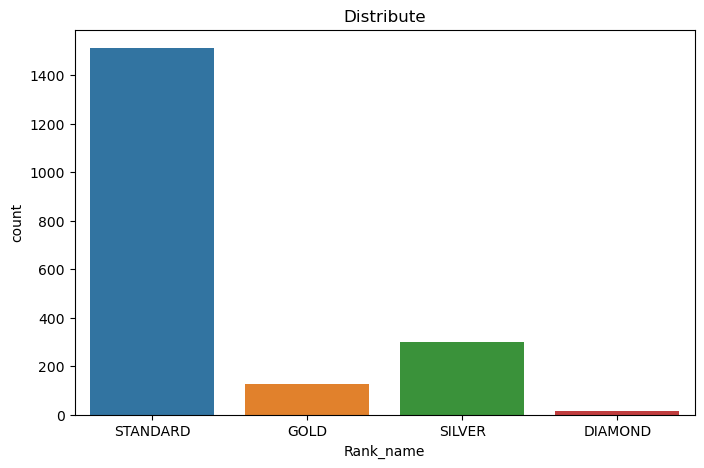

In [68]:
fig,ax=plt.subplots(figsize=(8,5))
sns.countplot(data=Loyalty_Ranking,x='Rank_name')
ax.set(title="Distribute");

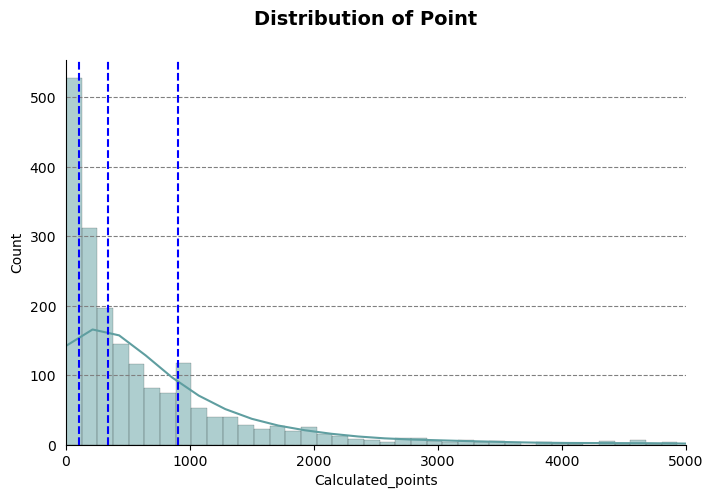

In [69]:
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.histplot(data=Loyalty_Ranking, x=Loyalty_Ranking['Calculated_points'], kde=True, color='#5f9ea0')
ax.axvline(np.percentile(Loyalty_Ranking['Calculated_points'], 25), color="blue", linestyle="--")
ax.axvline(np.percentile(Loyalty_Ranking['Calculated_points'], 50), color="blue", linestyle="--")
ax.axvline(np.percentile(Loyalty_Ranking['Calculated_points'], 75), color="blue", linestyle="--")
plt.xlim(0, 5000)

# vẽ các đường lưới ngang trên trục y của đồ thị.
ax.yaxis.grid(color='gray', linestyle='dashed')
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở  trục y
ax.tick_params(left=False) 

plt.suptitle('Distribution of Point', fontweight='bold', size=14, horizontalalignment='center')
plt.show();

In [70]:
Loyalty_Ranking['Calculated_points'].describe()

count     1952.000000
mean       728.445697
std       1755.278325
min          1.000000
25%        108.000000
50%        337.000000
75%        900.000000
max      42600.000000
Name: Calculated_points, dtype: float64

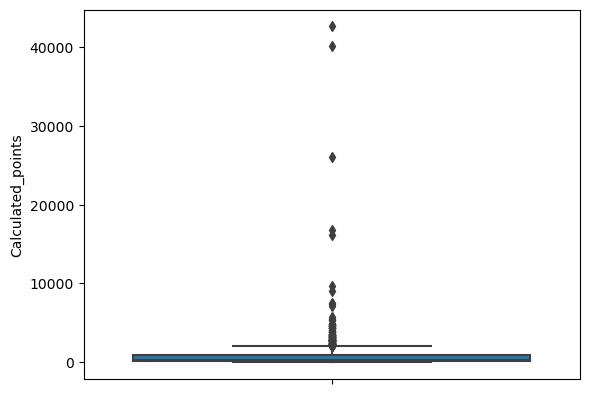

In [71]:
sns.boxplot(y=Loyalty_Ranking['Calculated_points']);